# Student Performance Indicator 

### Life cycle of Machine Learning Project

1. Understanding the problem statement
2. Data Collection
3. Data Checks to perform
4. Exploratory Data Analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model


## 1) Problem Statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preperation Course.

## 2) Data Collection

The data set consist of 8 columns and 1000 rows

#### 2.1) Import Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('data/raw_data.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

#### 2.2) Dataset Information

1. gender: female, male
2. race/ethnicity: Group(A,B,C,D,E)
3. parental_level_of_education: parent's final education -> (bachelor's degree,some college,master's degree,associate's degree,high school)
4. lunch: having lunch before exams (standard or free/reduced)
5. test_preparation_course: complete or not complete
6. math score
7. reading score
8. writing score

### 3) Data Checks to perform

 - Check missing value
 - Check Duplicates
 - Check data types
 - Check the number of unique values of each column
 - Check statistics of data set
 - Check various categories present in the different categorical column 

##### 3.1) Check Missing values

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No missing values

##### 3.2) Duplicate values

In [8]:
df.duplicated().sum()

0

No duplicate values

##### 3.3) Check data types and null


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### 3.4) Check the number of unique values of each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### 3.5) Check statistics of data set

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


###### Observation
1. Mean score range between 68 to 69
2. Minimum score in maths is 0 while writing score is 10 and highest is 17 in reading score

##### 3.6) Check various categories present in the different categorical column 

In [12]:
print("Categories in Gender: ", end=" ")
print(df["gender"].unique(), end="\n\n")

print("Categories in race_ethnicity: ", end=" ")
print(df["race_ethnicity"].unique(), end="\n\n")

print("Categories in parental_level_of_education: ", end=" ")
print(df["parental_level_of_education"].unique(), end="\n\n")


print("Categories in lunch: ", end=" ")
print(df["lunch"].unique(), end="\n\n")


print("Categories in test_preparation_course: ", end=" ")
print(df["test_preparation_course"].unique())


Categories in Gender:  ['female' 'male']

Categories in race_ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental_level_of_education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch:  ['standard' 'free/reduced']

Categories in test_preparation_course:  ['none' 'completed']


##### 3.7) Exploring Data

In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [14]:
# define numerical and categorical features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features: {} ".format(len(numerical_features),numerical_features),end="\n\n")
print("We have {} categorical features: {} ".format(len(categorical_features),categorical_features))



We have 3 numerical features: ['math_score', 'reading_score', 'writing_score'] 

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


##### 3.8) Adding Column for 'Total Score' and 'Average Score'


In [15]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = round(df['total_score']/3,2)

In [16]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33


#### 3.9) Check students full marks in maths, reading and writing

In [17]:
math_full = df[df['math_score'] == 100]['average_score'].count()
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()

print(f"Number of students who got full marks in math: {math_full}")
print(f"Number of students who got full marks in reading: {reading_full}")
print(f"Number of students who got full marks in writing: {writing_full}")

math_full

Number of students who got full marks in math: 7
Number of students who got full marks in reading: 17
Number of students who got full marks in writing: 14


7

#### 3.10) Check students who got less than 20 marks in maths, reading and writing

In [18]:
maths_20 = df[df['math_score'] <= 20]['average_score'].count()
reading_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_20 = df[df['writing_score'] <= 20]['average_score'].count()

print(f"Number of students who got less than 20 marks in math: {maths_20}") 
print(f"Number of students who got less than 20 marks in reading: {reading_20}")
print(f"Number of students who got less than 20 marks in writing: {writing_20}")

Number of students who got less than 20 marks in math: 4
Number of students who got less than 20 marks in reading: 1
Number of students who got less than 20 marks in writing: 3


##### Observations:

1. Student best performan in reading 
2. Student worst performance in math

### 4) Exploratory Data Analysis (Data Visualizaton)

#### 4.1) Visualize average score distribution

1. Histogram
2. KDE (Kernel Density Estimation)

<Axes: xlabel='average_score', ylabel='Count'>

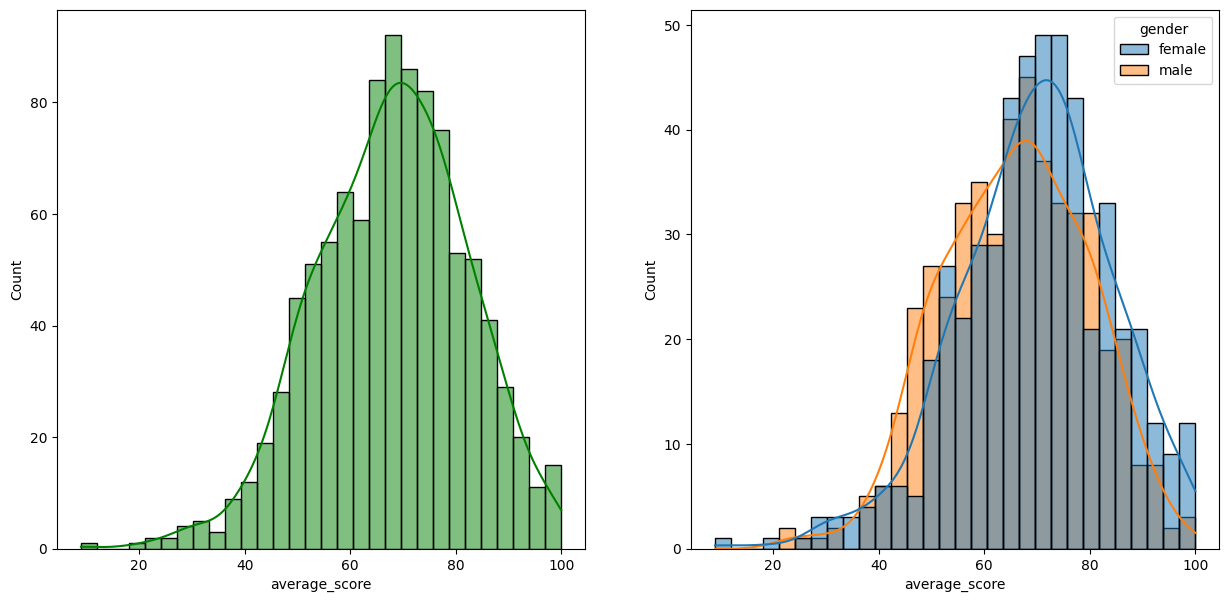

In [19]:
plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data= df , x= 'average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='gender')

Observations: 

Female students perform better than male students

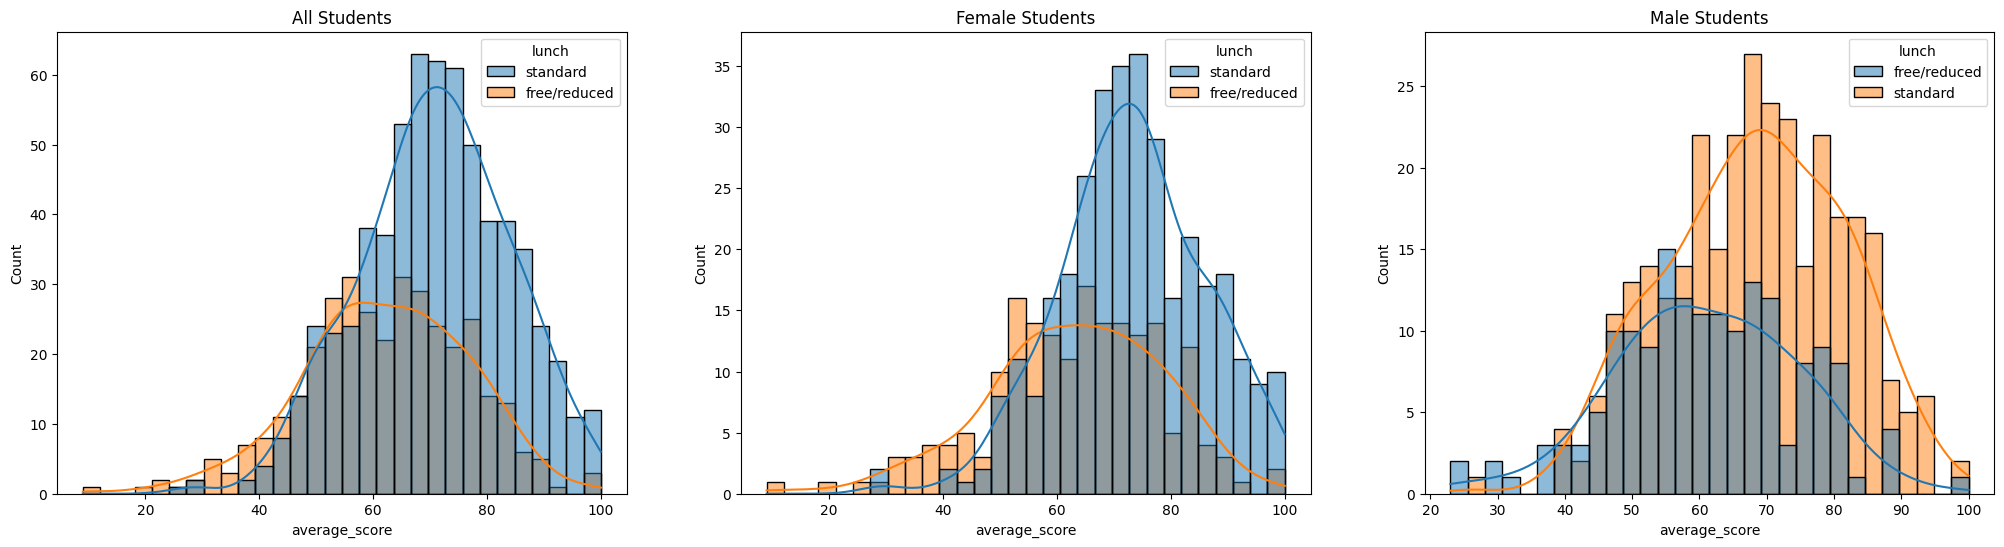

In [20]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='lunch').set_title("All Students")

plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'],x='average_score',bins=30,kde=True,hue='lunch').set_title("Female Students")

plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'],x='average_score',bins=30,kde=True,hue='lunch').set_title("Male Students")
plt.show()


Observations:

1. Standard lunch students perform better 
2. Standard lunch students perform better whether it is male or female

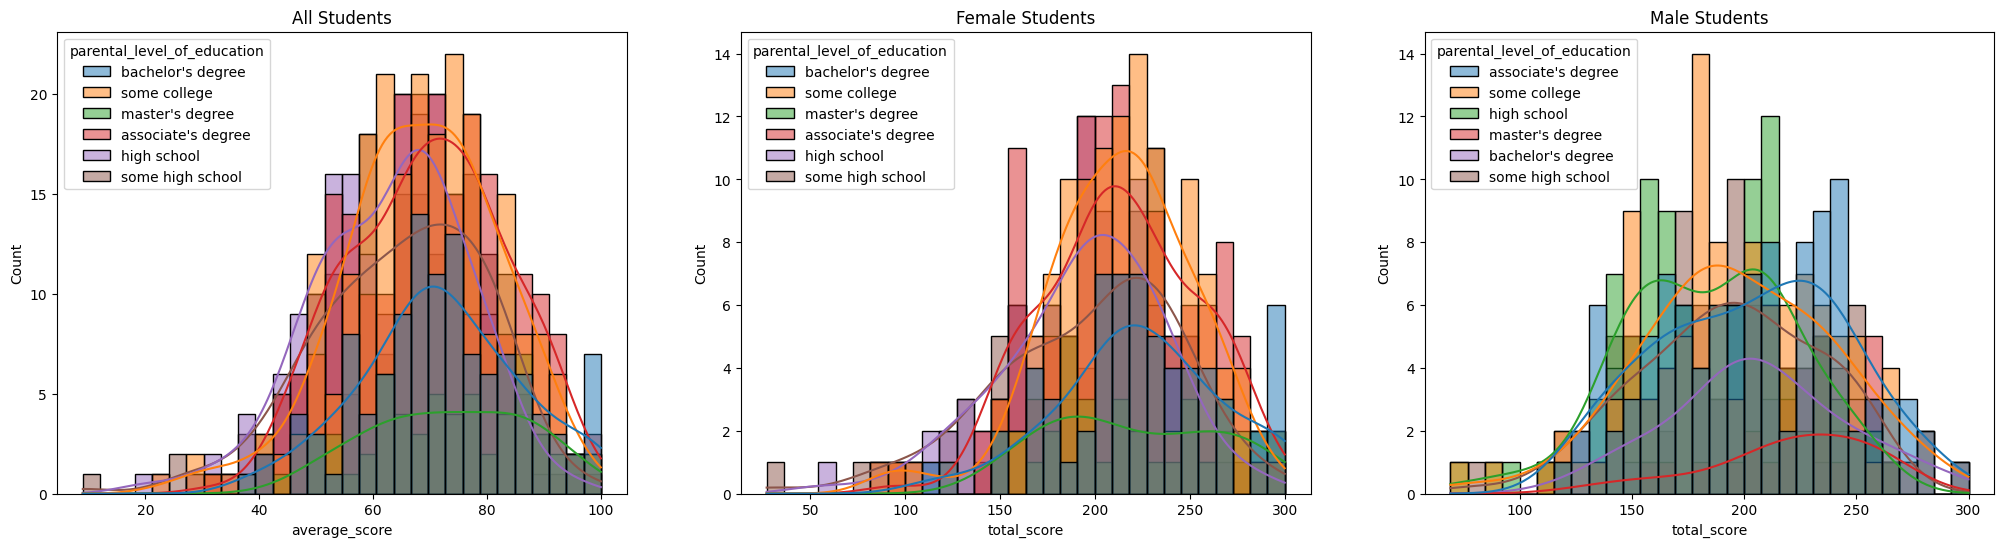

In [21]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='parental_level_of_education').set_title("All Students")

plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'],x='total_score',bins=30,kde=True,hue='parental_level_of_education').set_title("Female Students")

plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'],x='total_score',bins=30,kde=True,hue='parental_level_of_education').set_title("Male Students")
plt.show()


Observation: 

1. Overall parent education does not affect child score
2. Female students tends to perform better when parent education is some college or associate degree.
3. Parent education does not impact male students performance.
 

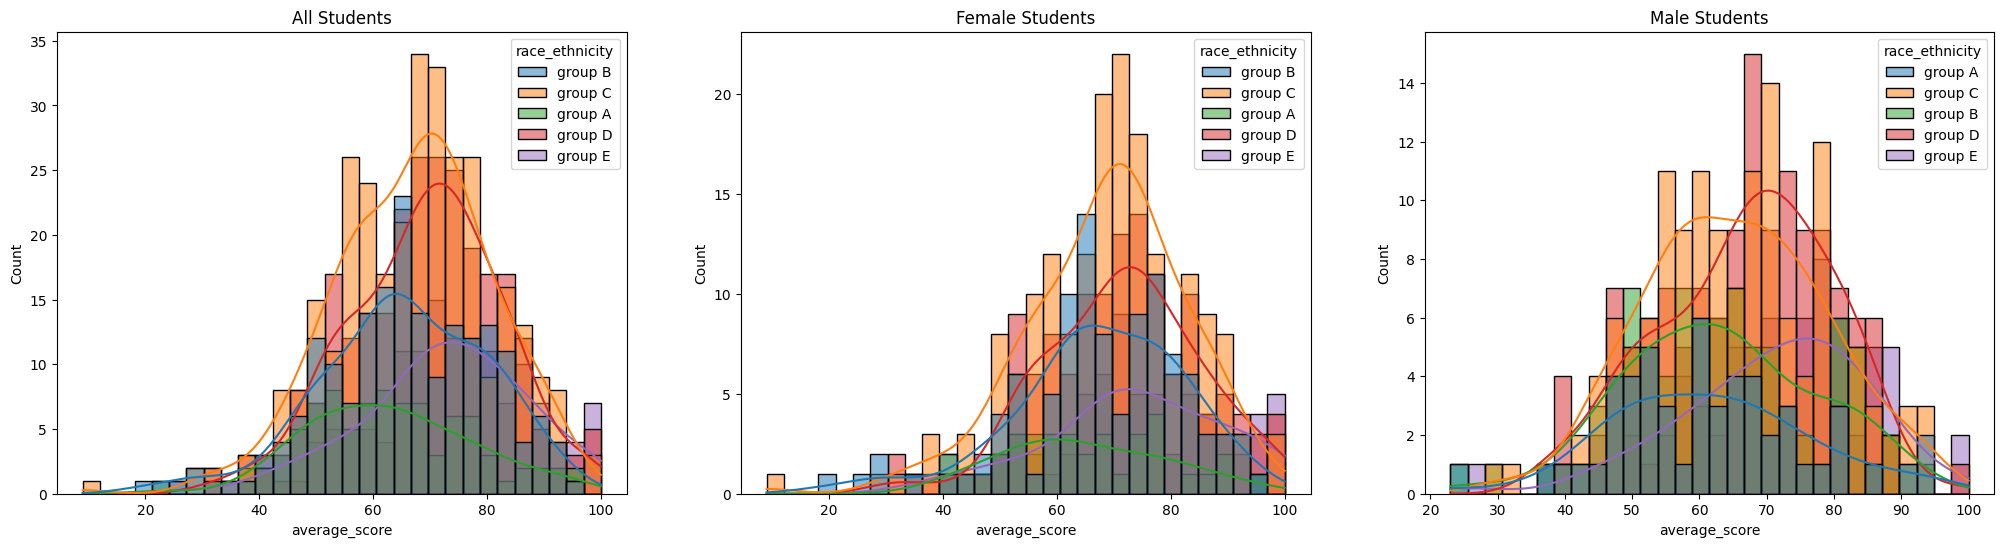

In [22]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='race_ethnicity').set_title("All Students")

plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'],x='average_score',bins=30,kde=True,hue='race_ethnicity').set_title("Female Students")

plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'],x='average_score',bins=30,kde=True,hue='race_ethnicity').set_title("Male Students")
plt.show()

Observations:

1. On average students perform better with race ethnicity of group C and D
2. In female students group C perform better.
3. Average students with race ethnicity of group A and B perform worst

##### 4.2) Maximum score of students in all three subjects


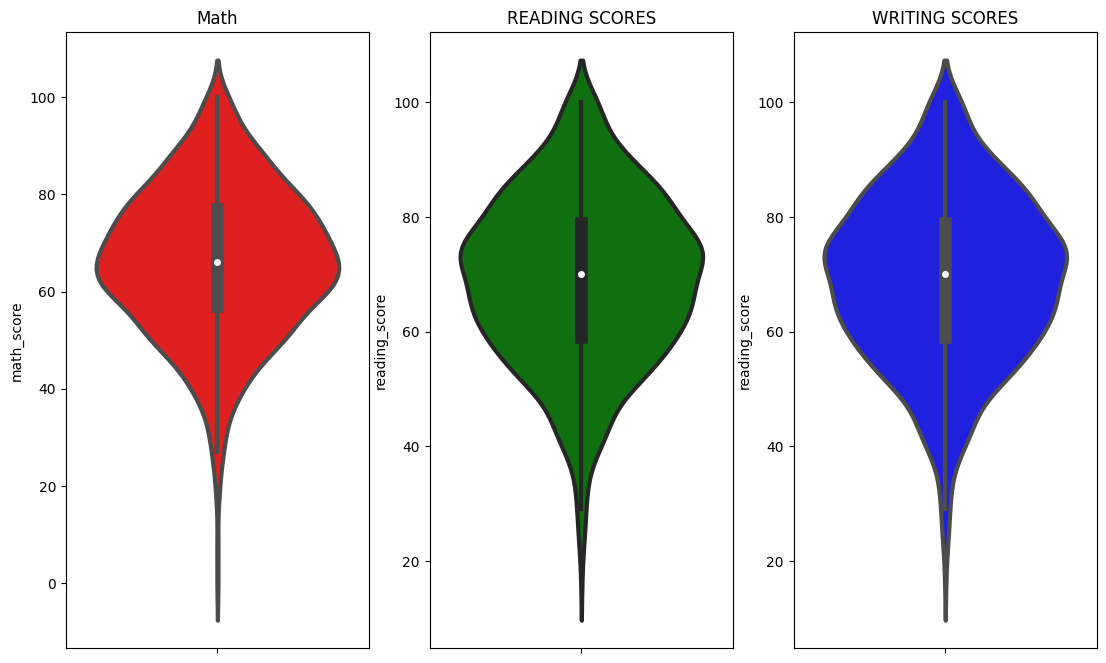

In [23]:

plt.figure(figsize=(18, 8))

plt.subplot(1,4,1)
plt.title("Math")
sns.violinplot(data=df,y=df['math_score'], color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='reading_score',data=df,color='blue',linewidth=3)
plt.show()




Observation:

1. From above three plots it is clear avg. students have score 60-80 marks in maths.
2. Reading and writing between 50-80 marks.

#### 4.3) Multivariate analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

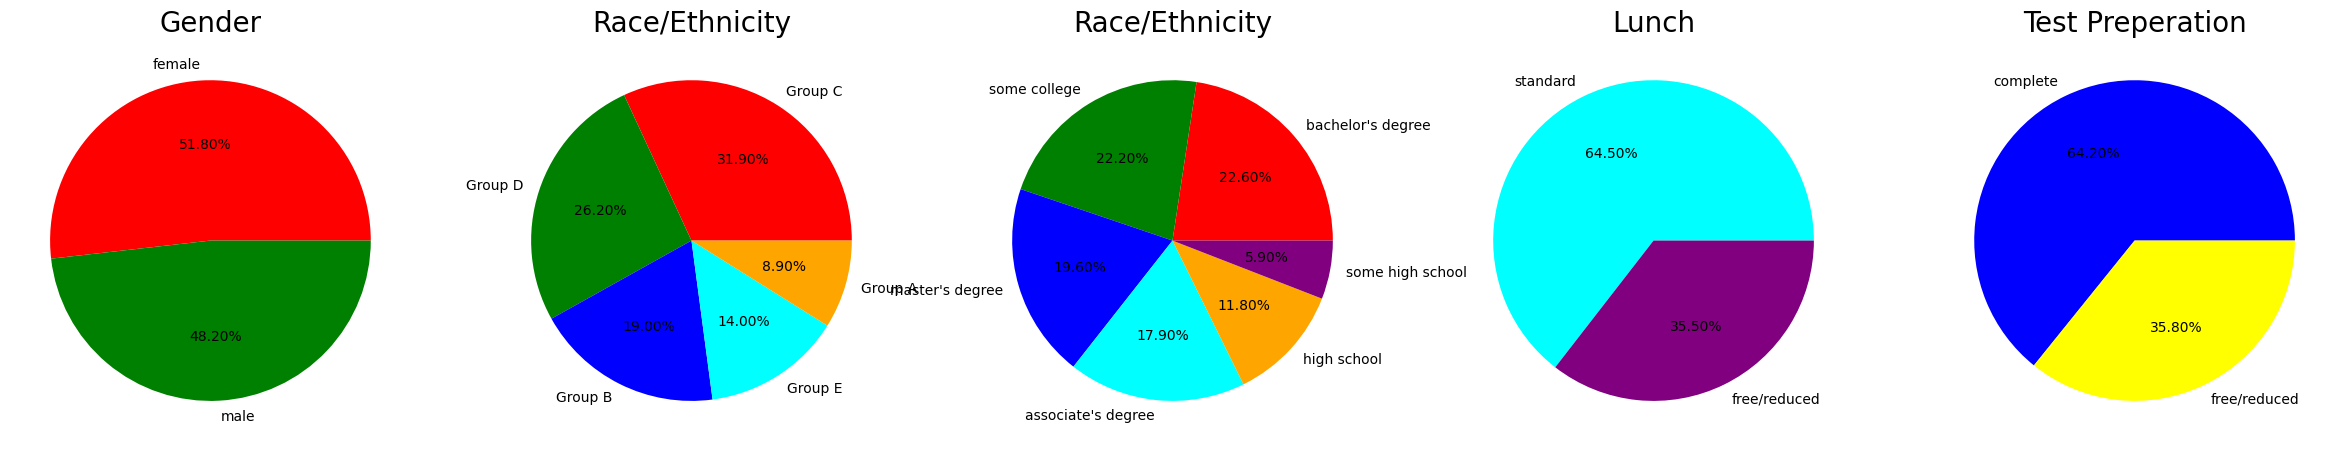

In [24]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = ['female' , 'male']
colors = ['red', 'green']

plt.pie(x=size,colors=colors,labels=labels,autopct= '%.2f%%')
plt.title('Gender',fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D','Group B','Group E','Group A']
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['parental_level_of_education'].value_counts()
labels = ['bachelor\'s degree', 'some college','master\'s degree','associate\'s degree','high school','some high school']
color = ['red', 'green', 'blue', 'cyan','orange','purple']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['lunch'].value_counts()
labels = ['standard', 'free/reduced']
color = ['cyan', 'purple']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['test_preparation_course'].value_counts()
labels = ['complete', 'free/reduced']
color = ['blue', 'yellow']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Test Preperation', fontsize = 20)
plt.axis('off')

Observations

1. No. of Male and female students are equal.
2. Group C sample is largest.
3. Parental level education of 'some college' is biggest.
4. Standart lunch is biggest.
5. Test preperation with complete is biggest.

#### 4.4) Feature wise visualization

##### 4.4.1 Gender Column

- How is distribution of Gender?
- Is gender has any impact on student's performance?

##### UNIVARIATE ANALYSIS (How is distribution of gender? )

([<matplotlib.patches.Wedge at 0x7fcb988800a0>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'Male'),
  Text(0.06782226650507357, -1.1980818587083752, 'Female')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.03956298879462625, -0.698881084246552, '48.2%')])

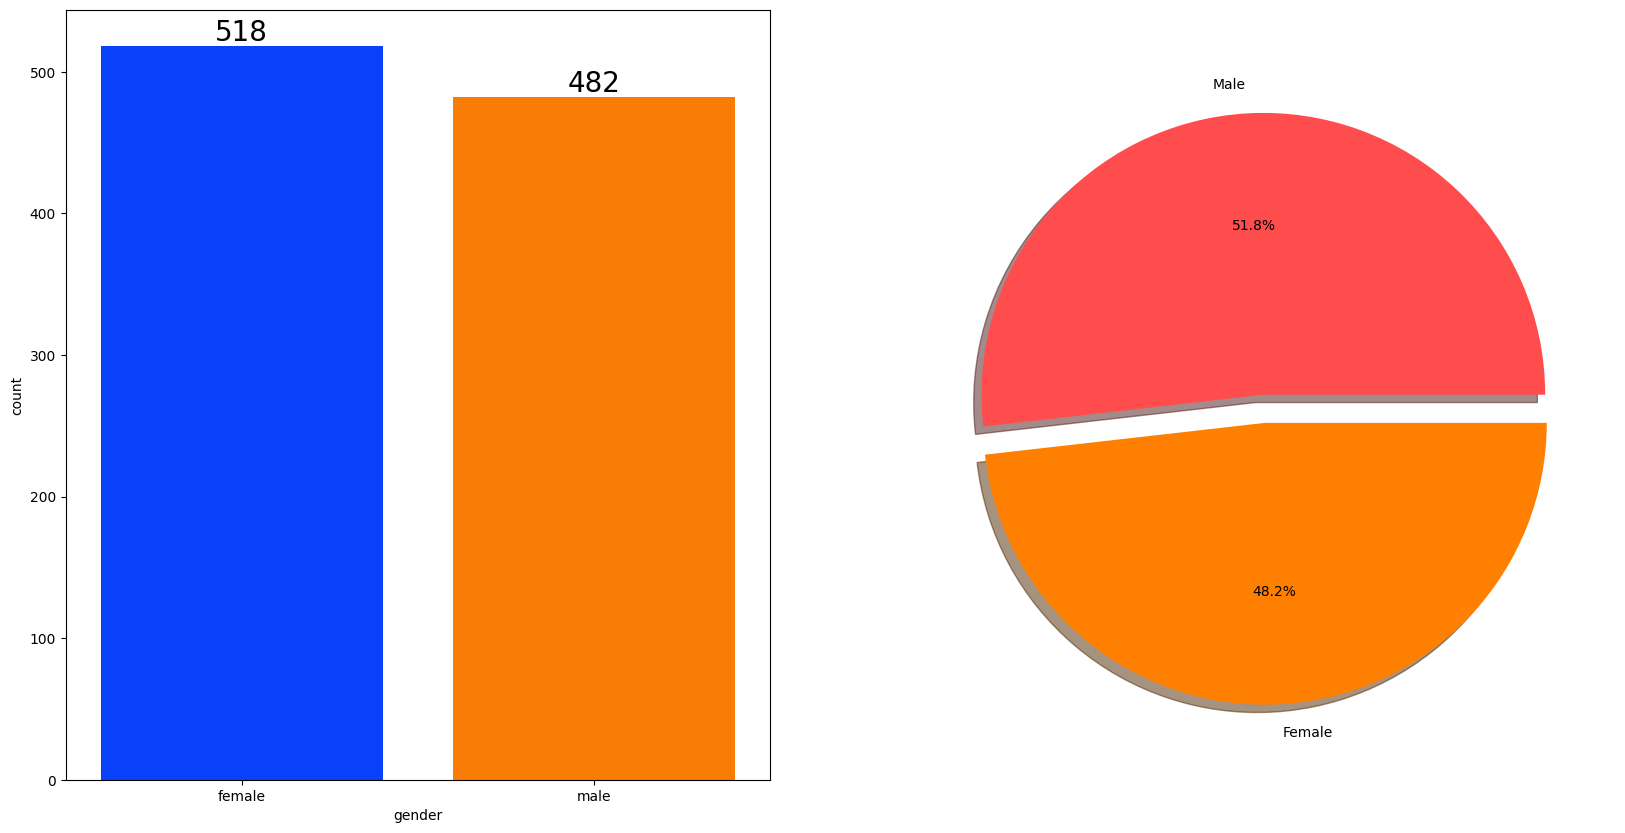

In [25]:
fig,axis =  plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['gender'],data=df,palette='bright',ax=axis[0],saturation=0.95)
for container in axis[0].containers:
    axis[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])

Observation:

- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)


##### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [26]:
gender_group = df.groupby('gender')[['average_score','math_score']].mean()
gender_group


,average_score,math_score
gender,,
female,69.569498,63.633205
male,65.837303,68.728216


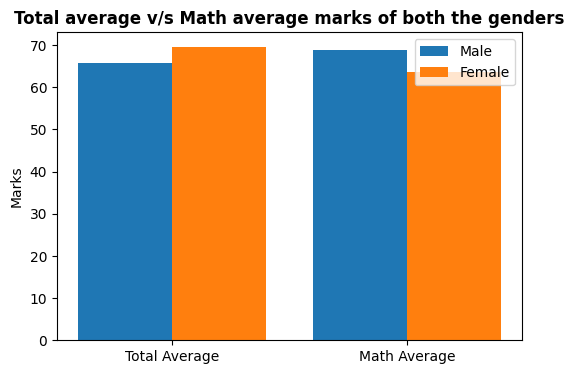

In [27]:
plt.figure(figsize=(6,4))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average_score'][0],gender_group['math_score'][0]] 
male_scores = [gender_group['average_score'][1],gender_group['math_score'][1]] 

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")


plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()




Observations:

1. Female student perform better than male on average.
2. Male student perform better than female in maths paper.

##### 4.4.2) Race/Ethnicity Column

1. How is Group wise distribution
2. Is race/Ethnicity has any impact on student performance?

##### UNIVARIATE ANALYSIS (How is distribution of Race/Ethnicity?)

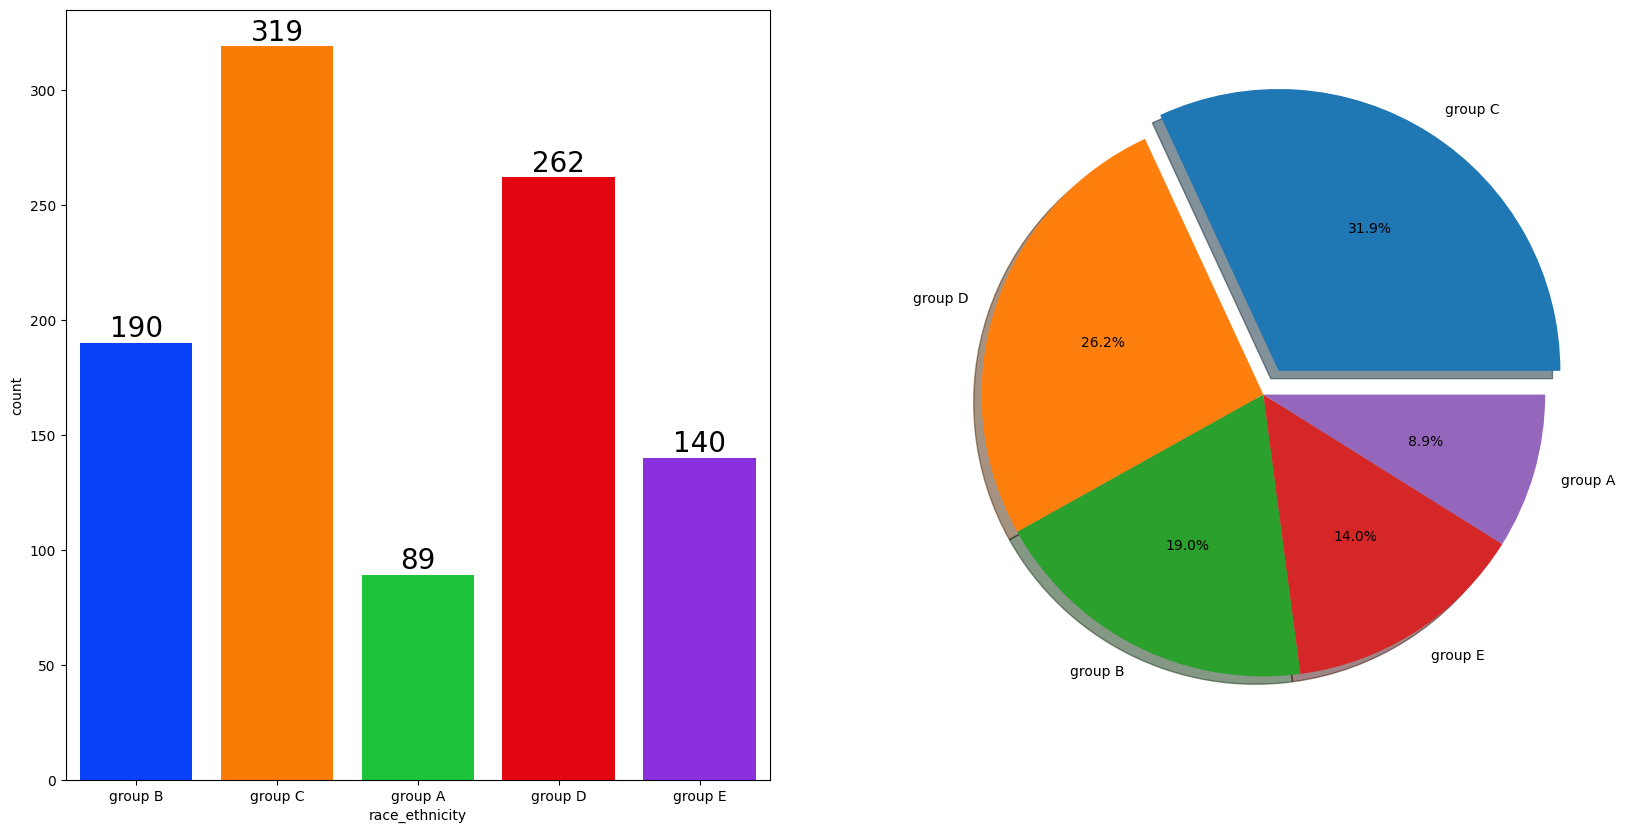

In [28]:
fig,axis =  plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=axis[0],saturation=0.95)
for container in axis[0].containers:
    axis[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=df["race_ethnicity"].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Observations:

1. Group C and D has the highest number of students i.e. 31.9%, 26.2%.
2. Group A has the lowest number of students i.e. 8.6%.

##### BIVARIATE ANALYSIS ( Is race/Ethnicity has any impact on student performance? )

In [29]:
gender_group = df.groupby('race_ethnicity')[['average_score','math_score']].mean()
gender_group


,average_score,math_score
race_ethnicity,,
group A,62.992135,61.629213
group B,65.468579,63.452632
group C,67.131567,64.463950
group D,69.179389,67.362595
group E,72.752000,73.821429


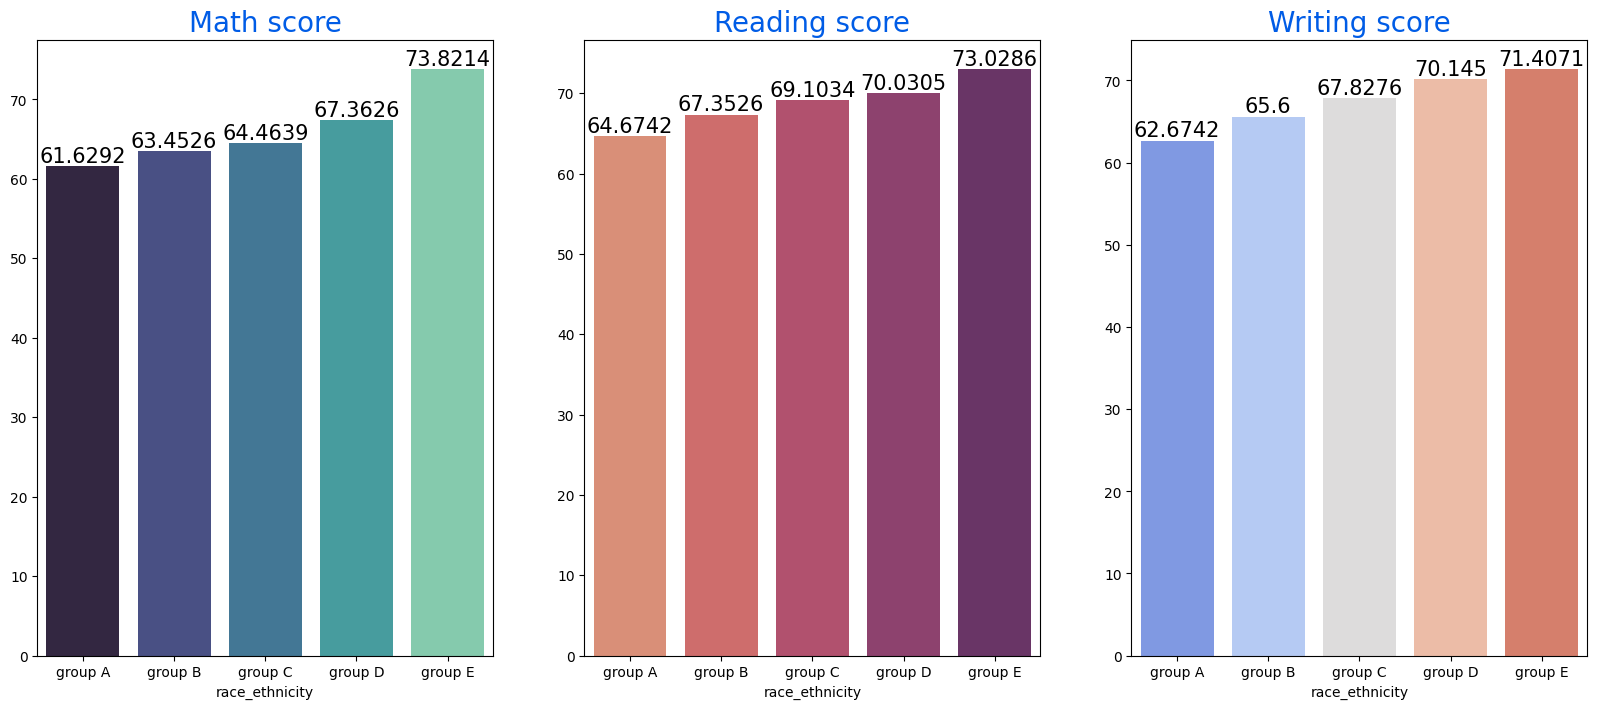

In [30]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


Observations: 

1. Group E has performed best in all the three subjects.
2. Group A has performed worst in all the three subjects.

##### 4.4.3) Parental level education Column


1. How is Parental level education distribution
2. Is Parental level education has any impact on student performance?

##### UNIVARIATE ANALYSIS (How is parental level education distribution?)

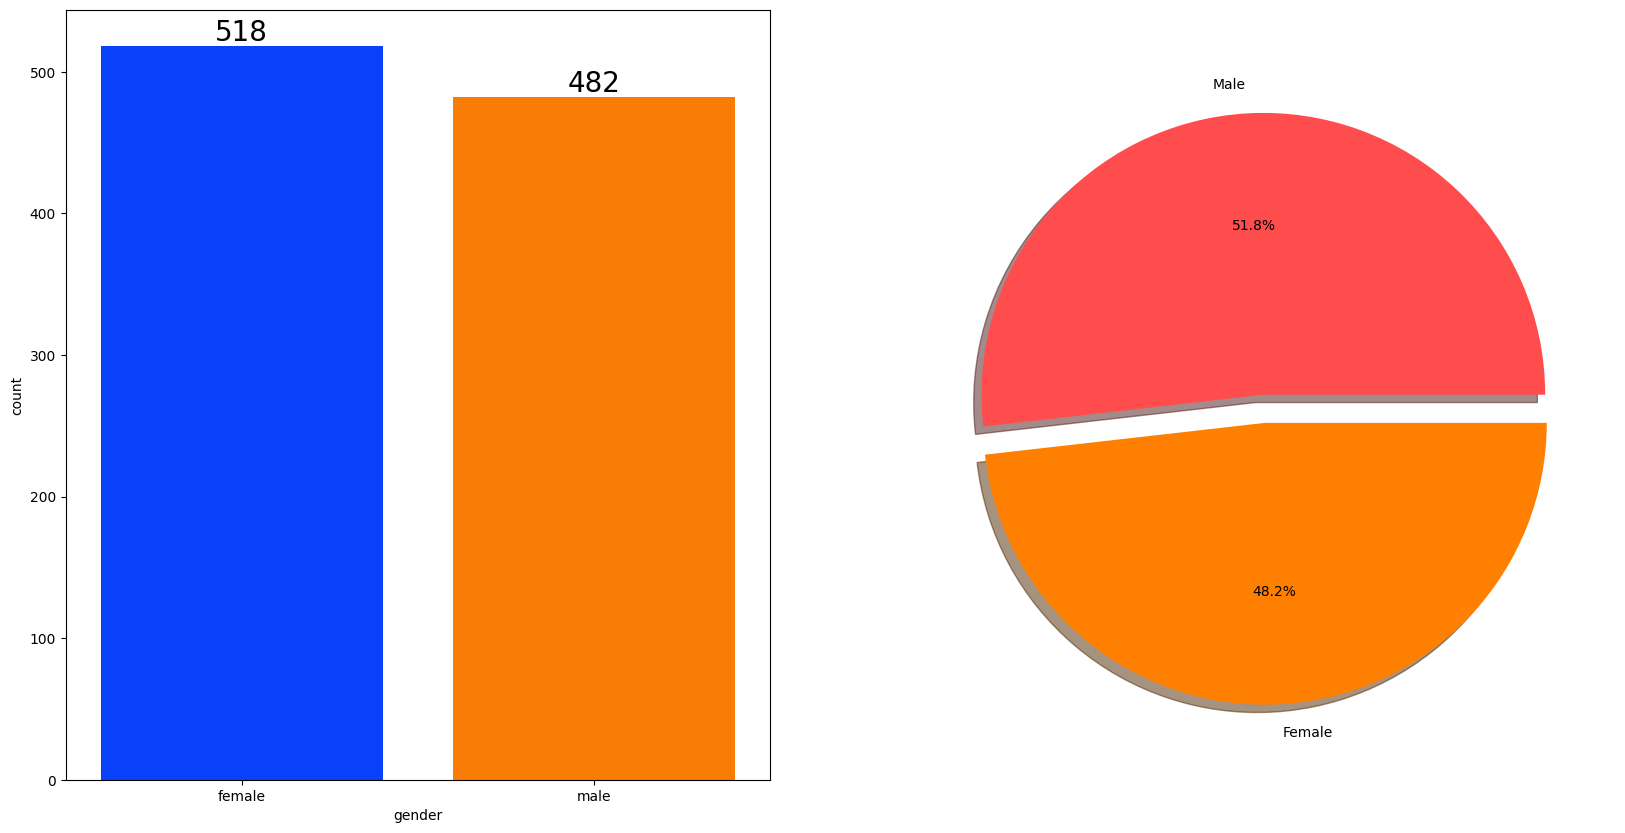

In [31]:
fig,axis =  plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['gender'],data=df,palette='bright',ax=axis[0],saturation=0.95)
for container in axis[0].containers:
    axis[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

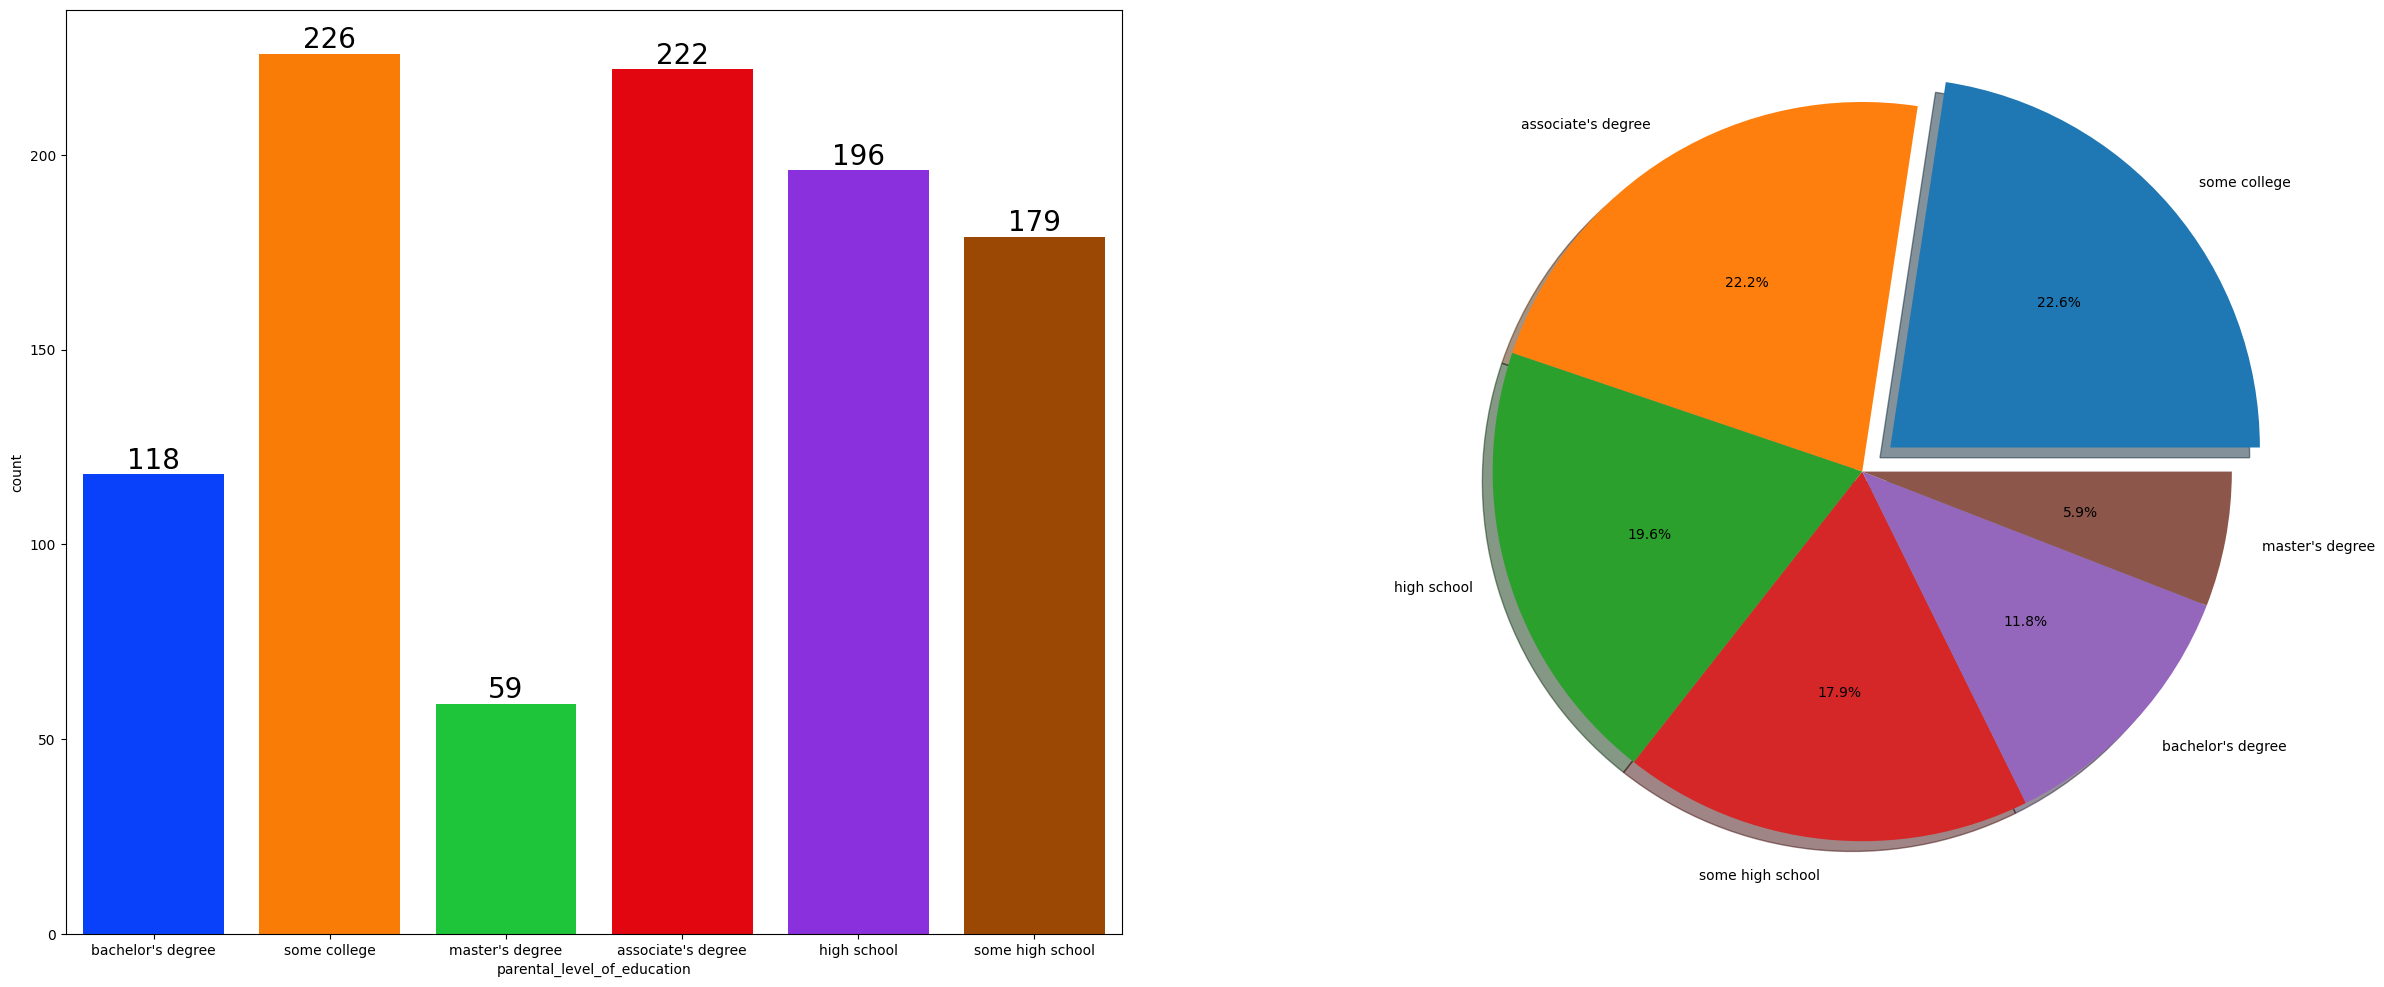

In [32]:
fig,axis = plt.subplots(1,2)

sns.countplot(x=df['parental_level_of_education'],palette='bright',data=df,ax=axis[0],saturation=0.95)
for container in axis[0].containers:
    axis[0].bar_label(container,color='black',size=20)

plt.pie(x=df["parental_level_of_education"].value_counts(),labels=df["parental_level_of_education"].value_counts().index,explode=[0.1,0,0,0,0,0],autopct='%.1f%%',shadow=True)
plt.show()

Observations:

1. Highest no.of students are from parent education some college.
2. Lowest no.of students are from parent education master's degree.

##### BIVARIATE ANALYSIS (Is Parental level education has any impact on student performance?)

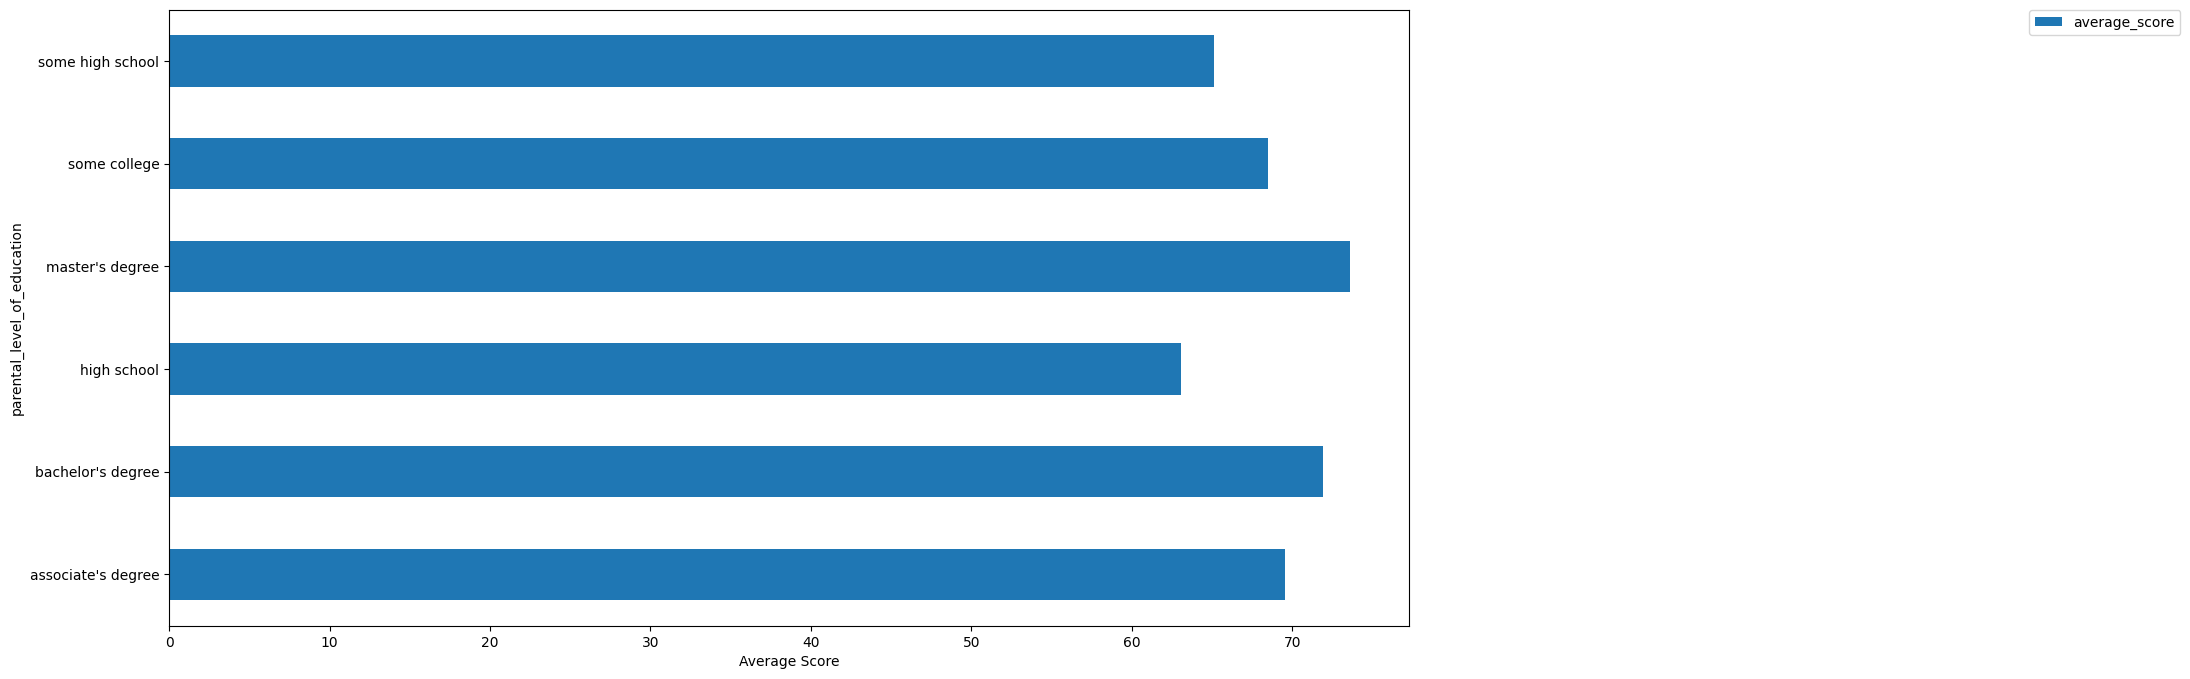

In [33]:
df.groupby('parental_level_of_education')['average_score'].agg('mean').plot(kind="barh",figsize=(16,8))
plt.legend(bbox_to_anchor=(1.5, 1.0),loc=2,borderaxespad=0.)
plt.xlabel("Average Score")
plt.show()

Observations:

- Student with parent education of master's and bachelor's degree tends to score better

##### 4.4.4) Lunch Column

- What type of lunch does common among students?
- Does lunch effect the scores of students? 

##### UNIVARIATE ANALYSIS (What type of lunch does common among students?)

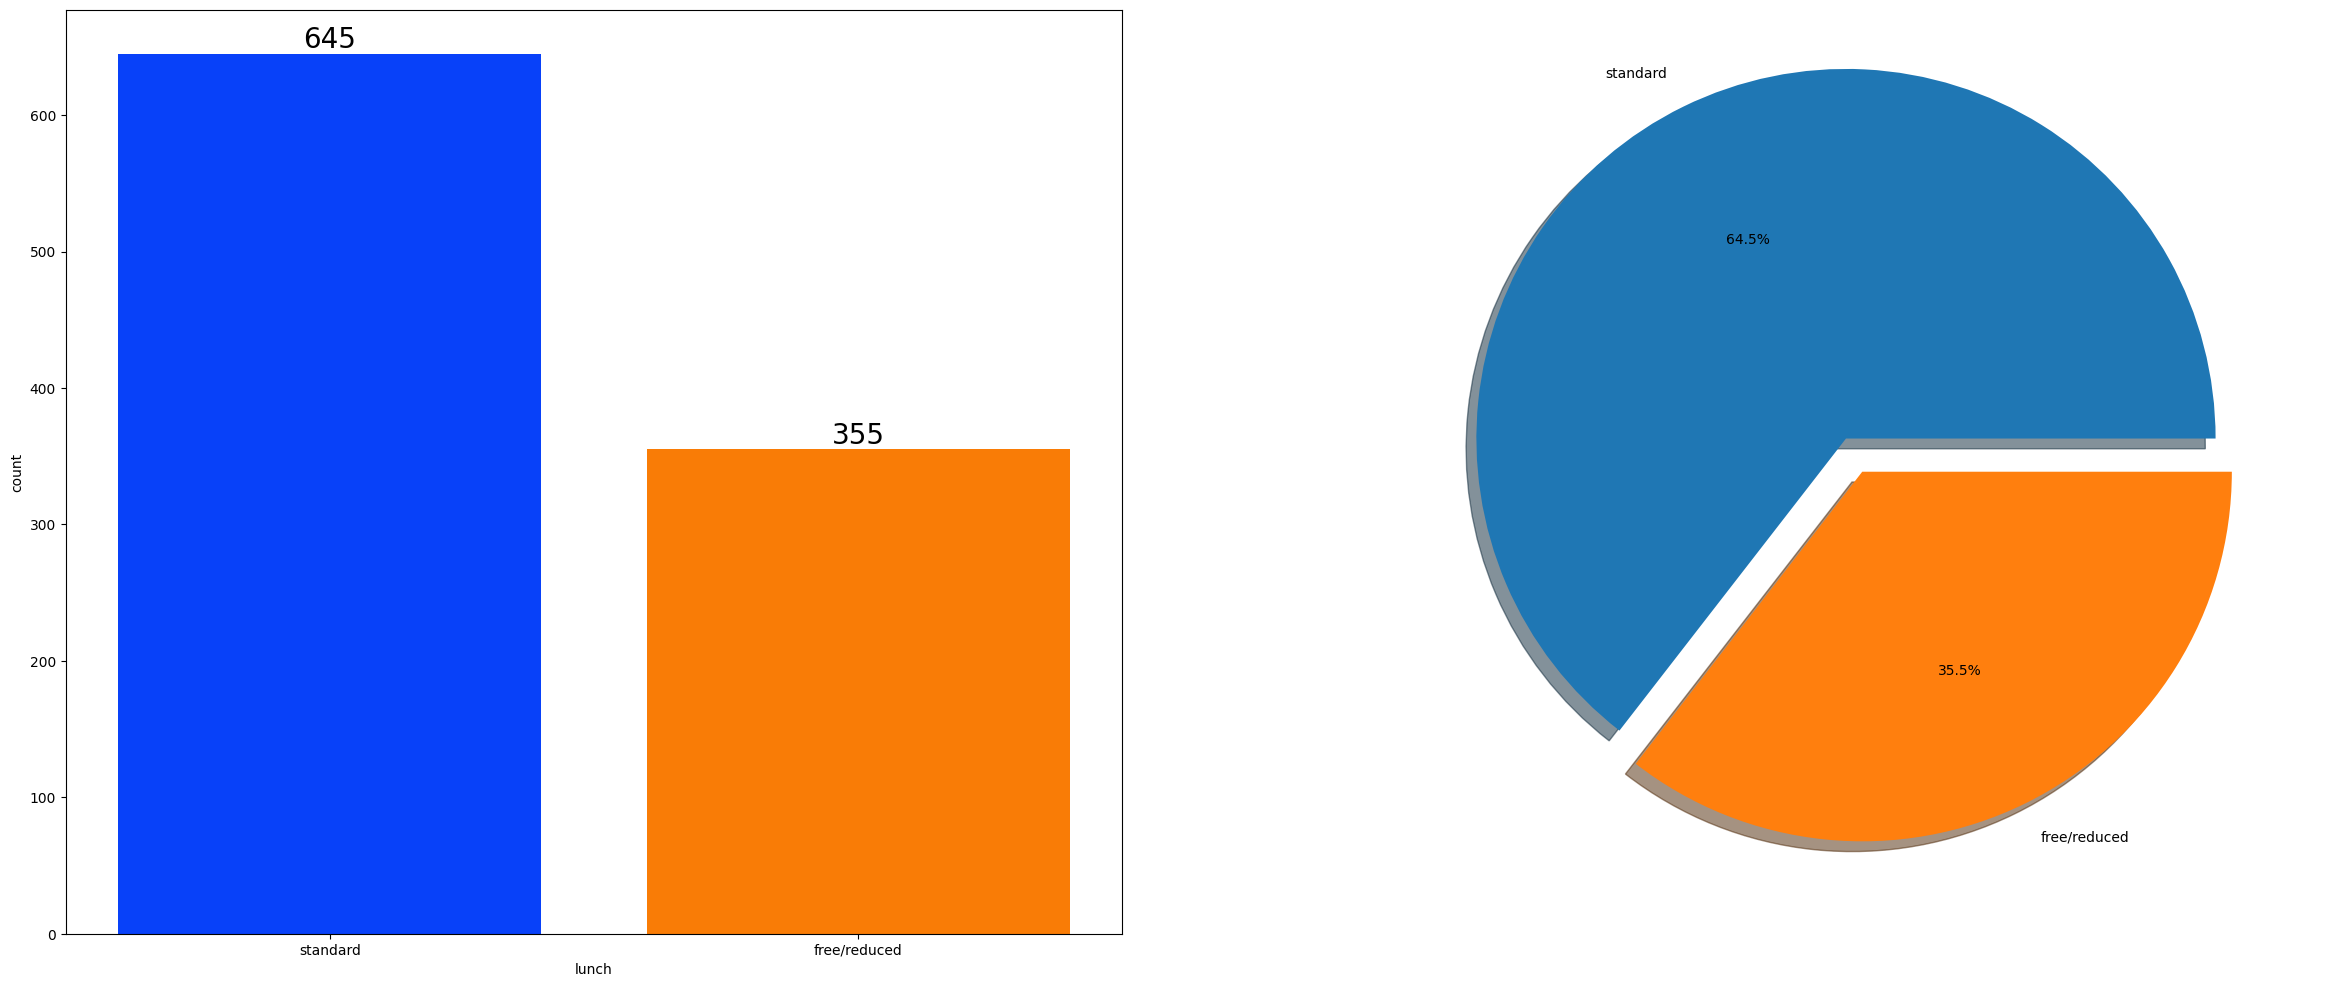

In [34]:
fig,axis = plt.subplots(1,2)

sns.countplot(x=df['lunch'],palette='bright',data=df,ax=axis[0],saturation=0.95)
for container in axis[0].containers:
    axis[0].bar_label(container,color='black',size=20)

plt.pie(x=df["lunch"].value_counts(),labels=df["lunch"].value_counts().index,explode=[0.1,0],autopct='%.1f%%',shadow=True)
plt.show()

Observations:

- Most of the students eat standard lunch

##### BIVARIATE ANALYSIS (Does lunch effect the scores of students?)

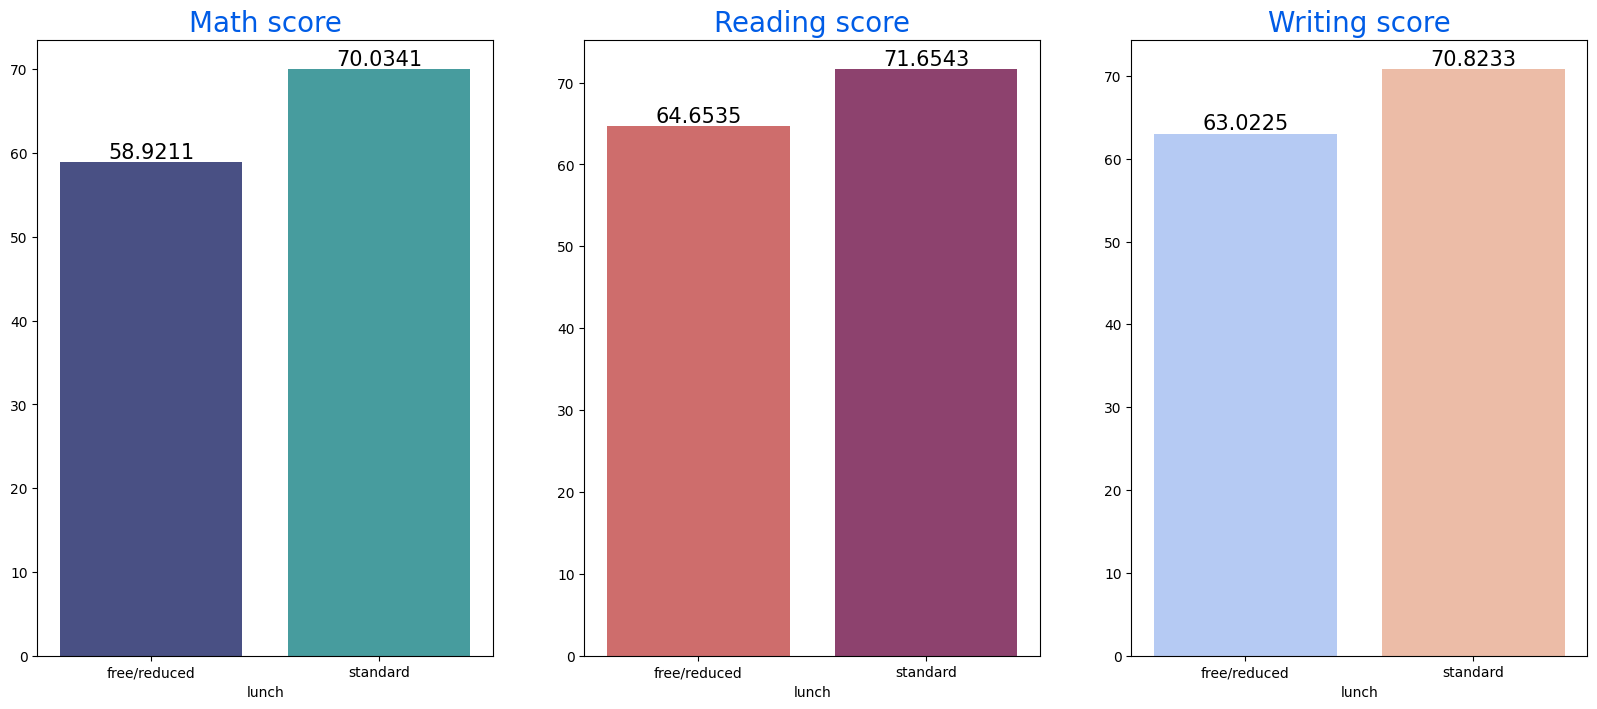

In [35]:
Group_data3=df.groupby('lunch')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data3['math_score'].mean().index,y=Group_data3['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['reading_score'].mean().index,y=Group_data3['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['writing_score'].mean().index,y=Group_data3['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Observations:

- Standard lunch students are performing better than free/reduced lunch students in all the three subjects.

##### 4.4.5 TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='test_preparation_course', ylabel='writing_score'>

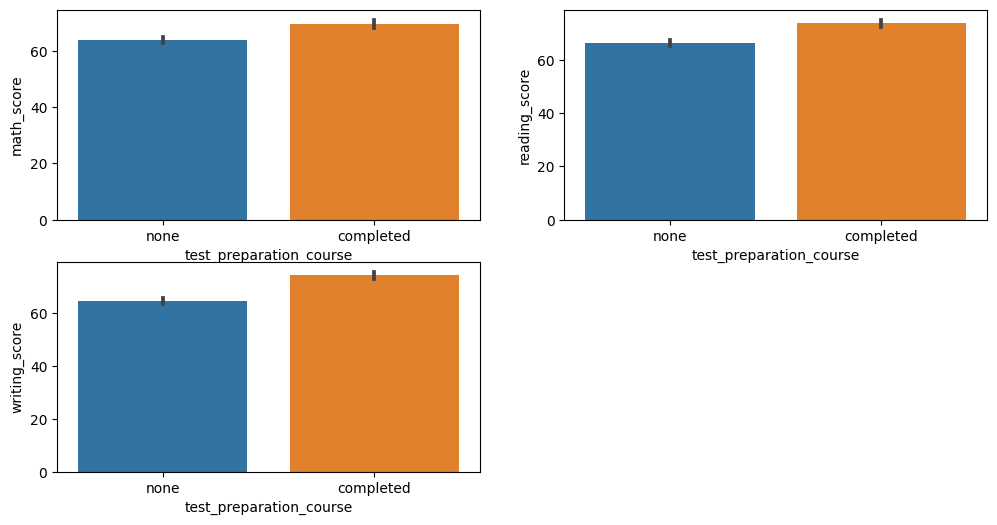

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['test_preparation_course'], y=df['math_score'])
plt.subplot(2,2,2)
sns.barplot (x=df['test_preparation_course'], y=df['reading_score'])
plt.subplot(2,2,3)
sns.barplot (x=df['test_preparation_course'], y=df['writing_score'])

Observations:

- Students who completed test preperation perform better.

##### 4.4.6 CHECKING OUTLIERS

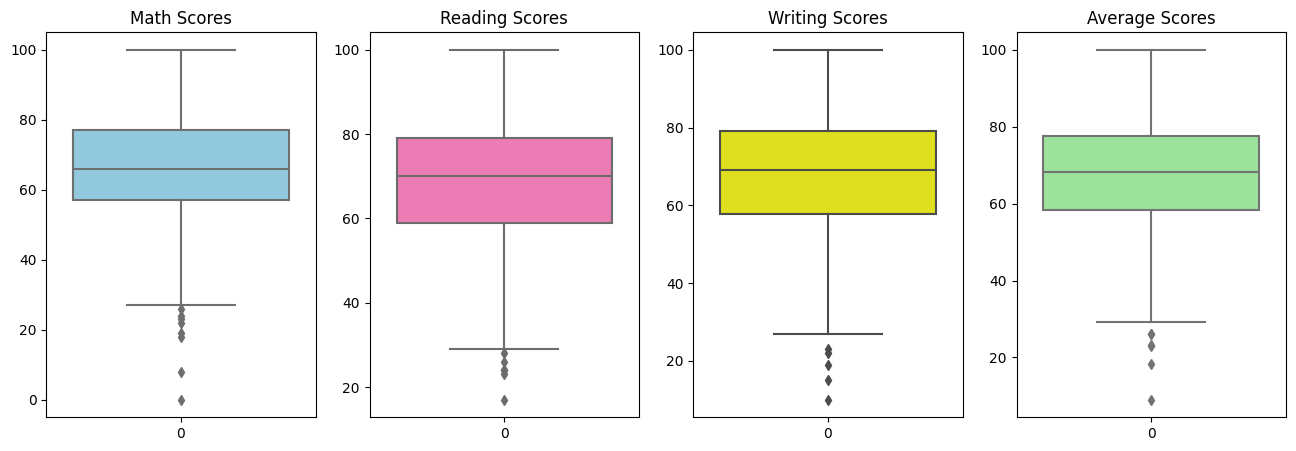

In [37]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

plt.subplot(141)
axes[0].set_title("Math Scores", color='black')
sns.boxplot(df['math_score'],color='skyblue')


plt.subplot(142)
axes[1].set_title("Reading Scores", color='black')
sns.boxplot(df['reading_score'],color='hotpink')

plt.subplot(143)
axes[2].set_title("Writing Scores", color='black')
sns.boxplot(df['writing_score'],color='yellow')


plt.subplot(144)
axes[3].set_title("Average Scores", color='black')
sns.boxplot(df['average_score'],color='lightgreen')

plt.show()

Observations:

- Outlier present below 30 in all three subjects

##### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

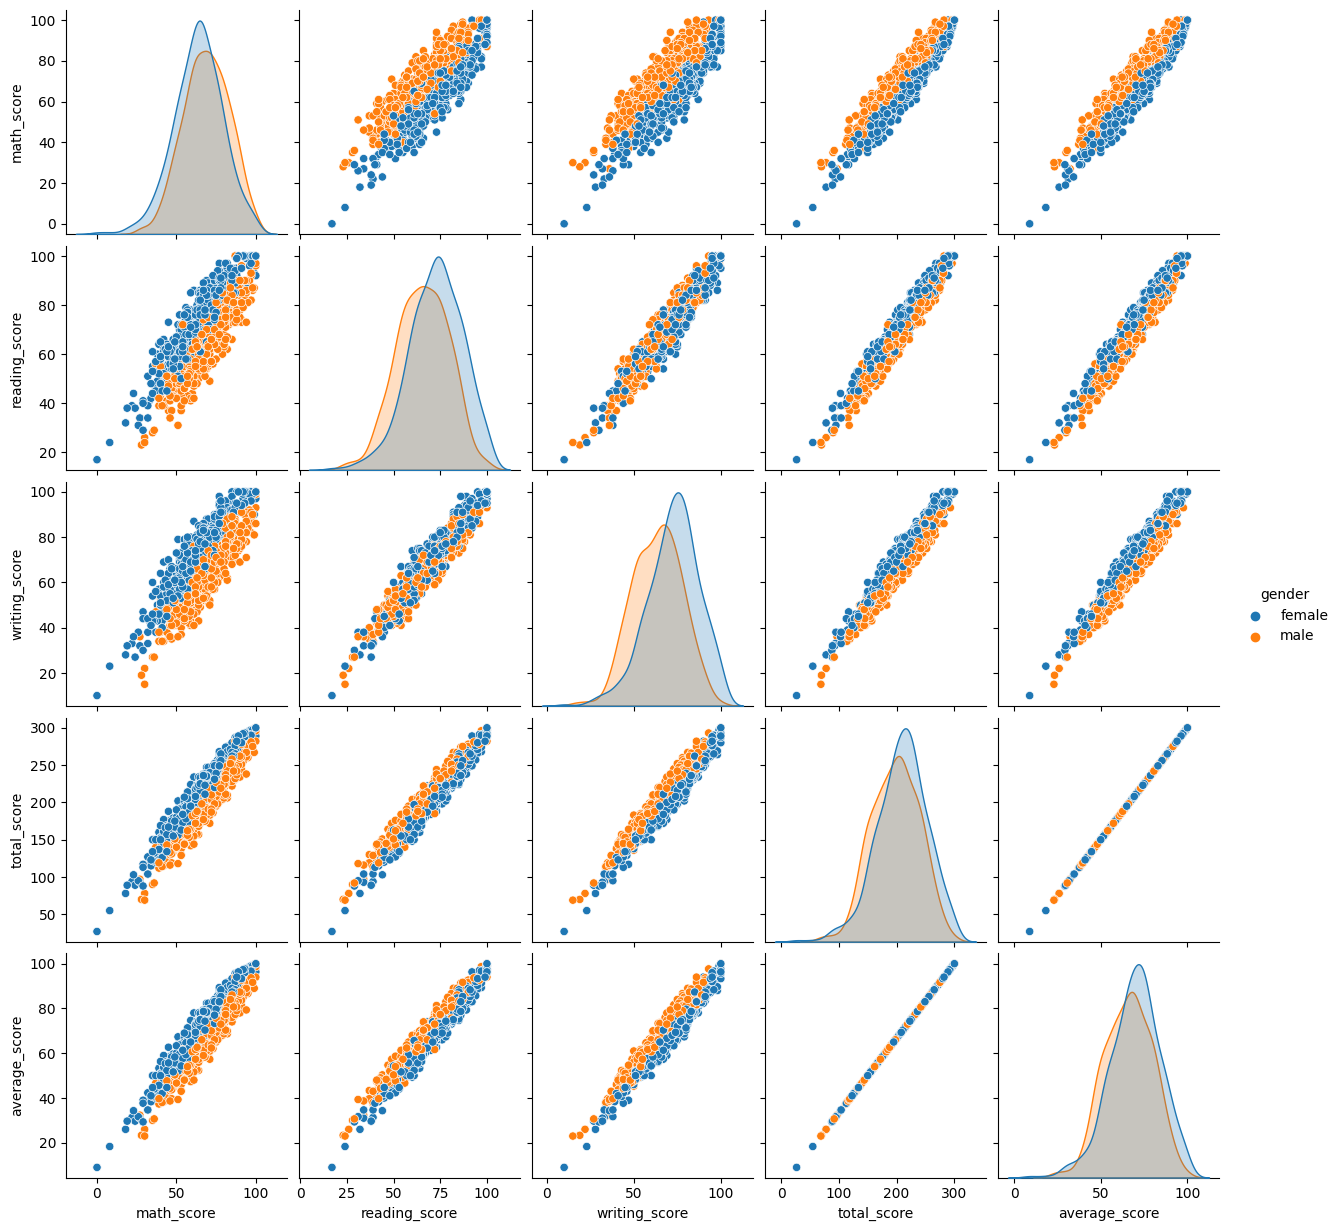

In [38]:
sns.pairplot(df,hue = 'gender')
plt.show()

Observations:

- From above plot all score increase linearly.

# 5) Conclusion

1. Student performance is related to race, lunch and parental level of education.
2. Female student lead in pass percentage but not in math score.
3. Student performance is not related to course preperations.
4. Finishing course is beneficial.